# Рынок заведений общественного питания Москвы

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import math as mth
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import plotly.express as px 

In [2]:
data = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/Rest/rest_data.csv')
display(data.head())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Таблица состоит из 6 колонок и 15366 строк.<br>
<br>
Есть данные разных типов:
- id и number целочисленные,
- object_name, object_type, chain, address - категориальные.

In [4]:
#проверяю дубликаты
print('Общее число дубликатов:', data.duplicated().sum())

#проверяю пропуски
print('Общее число пропущенных значений:', data.isna().sum())

print('Значения в object_name:', data['object_name'].sort_values().unique())
print('Количество уникальных значений в object_name:', data['object_name'].value_counts().count())

Общее число дубликатов: 0
Общее число пропущенных значений: id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64
Значения в object_name: ['1-ЫЙ МОСКОВСКИЙ КАДЕТСКИЙ КОРПУС' '1-й МОК' '100 личная столовая' ...
 'школа 775' 'школа 913' 'школа 919']
Количество уникальных значений в object_name: 10393


Пропуски данных и явные дубликаты отсутствуют.

In [5]:
data['object_name'] = data['object_name'].str.lower()
data['object_name'] = data['object_name'].replace('«','')
data['object_name'] = data['object_name'].replace(['ресторан«макдоналдс»','ресторан «макдоналдс»','mcdonalds'], 'макдоналдс')
'закусочная kfc'
data['object_name'] = data['object_name'].replace(['fridays kfc', 'kfc', 'kfc волгоградский', 'kfc.','закусочная kfc', 'закусочная «kfc»', 'кафе kfc', 'кафе «kfc»','пбо «kfc покрышкина»', 'пбо «kfc»','предприятие быстрого обслуживания «kfc»', 'ресторан kfc','ресторан «kfc»','ресторан быстрого питания kfc','ростикс kfc'], 'kfc')
print('Общее число дубликатов:', data.duplicated().sum())
data.head(20)

Общее число дубликатов: 0


,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,буфет мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,кпф семья-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,столовая мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [6]:
kfc = data[(data['object_name'].str.contains('kfc'))]
kfc['object_name'].sort_values().unique()

array(['kfc'], dtype=object)

In [7]:
#посмотрим уникальные значения по ряду столбцов
print('Значения в object_name:', data['object_name'].sort_values().unique())
print('Количество уникальных значений в object_name:', data['object_name'].value_counts().count())
print('Значения в chain:', data['chain'].sort_values().unique())
print('Количество уникальных значений в chain:', data['chain'].value_counts().count())
print('Значения в object_type:', data['object_type'].sort_values().unique())
print('Количество уникальных значений в object_type:', data['object_type'].value_counts().count())
print('Значения в address:', data['address'].sort_values().unique())
print('Количество уникальных значений в address:', data['address'].value_counts().count())
print('Значения в number:', data['number'].sort_values().unique())
print('Количество уникальных значений в number:', data['number'].value_counts().count())

Значения в object_name: ['1-й мок' '1-ый московский кадетский корпус' '100 личная столовая' ...
 'яуза' 'ёбидоёби' 'ёрш']
Количество уникальных значений в object_name: 9907
Значения в chain: ['да' 'нет']
Количество уникальных значений в chain: 2
Значения в object_type: ['бар' 'буфет' 'закусочная' 'кафе' 'кафетерий' 'магазин (отдел кулинарии)'
 'предприятие быстрого обслуживания' 'ресторан' 'столовая']
Количество уникальных значений в object_type: 9
Значения в address: ['1-й Нагатинский проезд, дом 10'
 '1-я Тверская-Ямская улица, дом 29/66, корпус 1'
 '2-я Брестская улица, дом 1, строение 1' ...
 'улица Миклухо-Маклая, дом 18' 'улица Обручева, дом 23, строение 1'
 'улица Сергея Макеева, дом 9, строение 2']
Количество уникальных значений в address: 9108
Значения в number: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42

В данных 15366 строк и:<br>
- 10393 уникальных названия заведений: скорее всего, присутствуют сети ресторанов с одним именем, потому что дубликатов не выявлено.<br>
- 2 вида ресторанов по количеству заведений: сетевые и несетевые (подтверждение гипотезы выше).<br>
- типов заведений может быть 9.<br>
- уникальных адресов 9108: соответственно, в некоторых домах может быть несколько разных ресторанов.<br>
- вариаций количества посадочных мест - 315: от 0 (киоск?) до 1700 человек.<br>

## Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству

#### Разные типы заведений общественного питания и их количество

In [8]:
data_type = data.groupby('object_type')['object_name'].count().sort_values(ascending=False)
print(data_type)

object_type
кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_name, dtype: int64


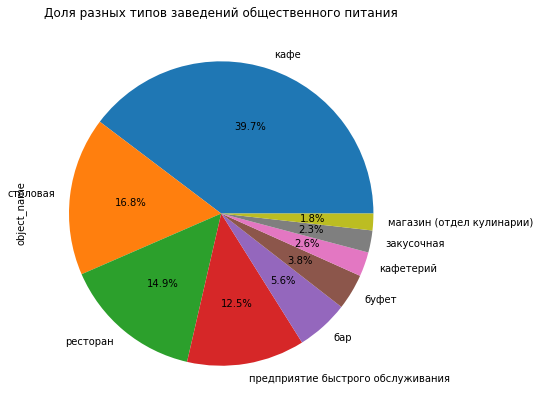

In [9]:
data_type.plot(kind='pie', figsize=(10,7), autopct='%1.1f%%')
plt.title('Доля разных типов заведений общественного питания')
plt.show()

Больше всего общественного питания типа: кафе, затем столовых и на третьем месте рестораны.

#### Разделение заведений общественного питания на сетевые/ несетевые

In [10]:
data_chain = data.groupby('chain')['object_name'].count().sort_values(ascending=False)
print(data_chain)

chain
нет    12398
да      2968
Name: object_name, dtype: int64


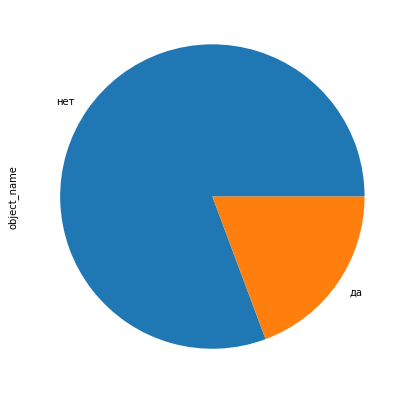

In [11]:
data_chain.plot(kind='pie', figsize=(10,7))
plt.show()

Большая часть заведений не являются сетевыми.

#### Разные типы заведений общественного питания и их особенности при разделении на сетевые/несетевые

In [12]:
data_chain_type = data.pivot_table(index = ['object_type','chain'], values = 'object_name', aggfunc = 'count').reset_index().sort_values(by='object_name', ascending=False)
display(data_chain_type)

,object_type,chain,object_name
7,кафе,нет,4703
17,столовая,нет,2584
15,ресторан,нет,1741
6,кафе,да,1396
13,предприятие быстрого обслуживания,нет,1132
1,бар,нет,819
12,предприятие быстрого обслуживания,да,791
3,буфет,нет,574
14,ресторан,да,544
9,кафетерий,нет,346


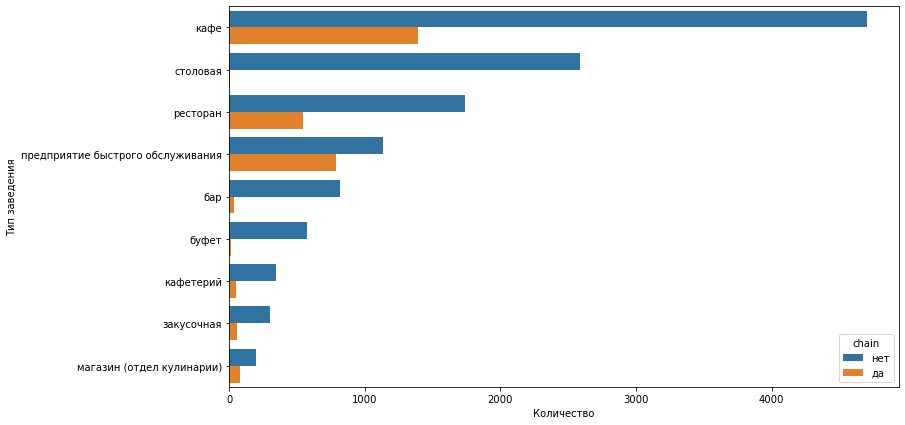

In [15]:
plt.figure(figsize=(12,7))
sns.barplot(data=data_chain_type, x='object_name', y='object_type',hue='chain')
plt.xlabel('Количество')
plt.ylabel('Тип заведения')
plt.show()

Сетевые заведения более всего характерны для предприятий быстрого обслуживания. Посчитаем доли сетевых заведений по типам заведений в общем числе.

In [16]:
data_chain_perc = ((data.query('chain=="да"').groupby(['object_type'])['object_name'].count())/(data.groupby(['object_type'])['object_name'].count())).sort_values(ascending=False)
print(data_chain_perc)

object_type
предприятие быстрого обслуживания    0.411336
магазин (отдел кулинарии)            0.285714
ресторан                             0.238074
кафе                                 0.228890
закусочная                           0.155556
кафетерий                            0.130653
бар                                  0.043224
буфет                                0.018803
столовая                             0.001160
Name: object_name, dtype: float64


Наиболее часто среди сетевых заведений встречаются: предприятия быстрого обслуживания, отделы кулинарии в магазинах, рестораны.

#### Особенности сетевых заведений

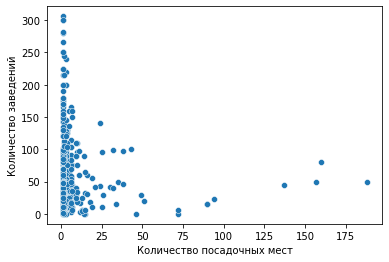

In [17]:
rest_chain = data.query('chain=="да"')
rest_chain_grouped=rest_chain.groupby(['object_name']).agg({'number':'median','object_name':'count'})
rest_chain_grouped.rename(columns = {'object_name' : 'qnt'}, inplace = True)
rest_chain_grouped.sort_values(by='qnt',ascending=False)

ax = sns.scatterplot(data = rest_chain_grouped, y = "number", x = "qnt")
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.show()

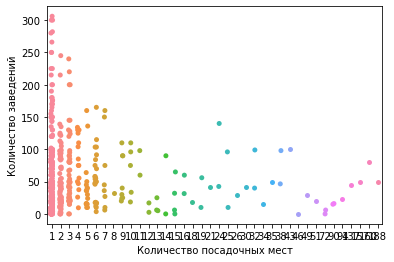

In [18]:
ax = sns.stripplot(data = rest_chain_grouped, x = "qnt", y = "number")
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.show()

По диаграмме рассеяния видно, что большая часть сетевых заведений имеет ориентировочно до 100 зведений с количеством посадочных мест до 25. Т.е. для сетевых ресторанов характерно много заведений с небольшим числом посадочных мест в каждом.</div>

#### Количество посадочных мест для каждого вида обьекта общественного питания

Рассчитаю среднее количество посадочных мест для каждого вида объекта общественного питания.

In [19]:
all_type_number = data.groupby(['object_type'])['number'].mean().reset_index().sort_values(by='number', ascending=False)
display(all_type_number)

,object_type,number
8,столовая,130.246618
7,ресторан,96.834136
1,буфет,51.129915
0,бар,43.494159
3,кафе,39.716019
6,предприятие быстрого обслуживания,20.552262
4,кафетерий,9.123116
2,закусочная,7.608333
5,магазин (отдел кулинарии),5.589744


В среднем максимальное число посадочных мест характерно для столовых, на втором месте - рестораны. Самое маленькое количество посадочных мест в кафе.

In [20]:
#интересно посчитать, если отличия с медианой
all_type_number = data.groupby(['object_type'])['number'].median().reset_index().sort_values(by='number', ascending=False)
display(all_type_number.head())

,object_type,number
8,столовая,103.0
7,ресторан,80.0
0,бар,35.0
1,буфет,32.0
3,кафе,30.0


Наиболее характерное количесвто посадочных для разных заведений отличается от среднего числа, но не критично и в целом иерархия заведений остается такой же.

Text(0, 0.5, 'Тип заведения')

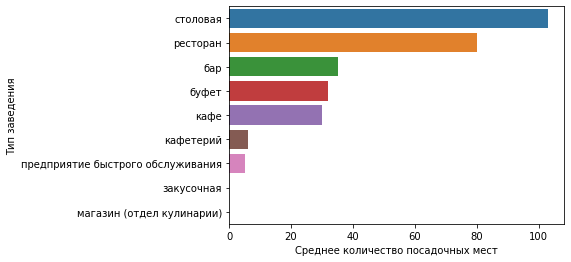

In [21]:
sns.barplot(data=all_type_number, x='number', y='object_type')
plt.xlabel('Среднее количество посадочных мест')
plt.ylabel('Тип заведения')

#### Расположение обьектов общественного питания в Москве

In [22]:
#выделим название улиц в отдельную колонку
pd.options.display.max_colwidth = 100
data['street'] = data['address'].str.split(', ', expand = True)[1]
display(data.head(5))
data.groupby(['street'])['object_name'].count().reset_index().sort_values(by='object_name', ascending=False)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


,street,object_name
1334,город Зеленоград,232
1452,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
...,...,...
1343,дом 1,1
1345,дом 10,1
1346,дом 11,1
1347,дом 118Б,1


In [23]:
data[data['street'].apply(len).lt(6)]

,id,object_name,chain,object_type,address,number,street
7938,25019,клуб высоцкого,нет,кафе,"Нижний Таганский тупик, дом 3, строение 1",94,дом 3
8771,144391,винный бар alma valley,нет,бар,"Погодинская улица, дом 4, строение 1",30,дом 4
8776,26477,ресторан «2545»,нет,ресторан,"2-я Брестская улица, дом 1, строение 1",30,дом 1
8813,145235,кафе при азс,нет,кафе,"проезд Добролюбова, дом 2",0,дом 2
8842,19800,набатчиков а.п.,нет,буфет,"Проектируемый проезд N 5231, дом 8, строение 3",20,дом 8
8854,140002,ресторан «пальмира»,нет,ресторан,"Новоданиловская набережная, дом 6",80,дом 6
10010,171646,столовая - буфет при цатра,нет,столовая,"Суворовская площадь, дом 2",40,дом 2
10715,178003,столовая,нет,столовая,"2-я Брестская улица, дом 5, строение 1",30,дом 5
11615,175550,кафе «кофе & молоко»,нет,кафе,"улица Сергея Макеева, дом 9, строение 2",15,дом 9
11963,189558,гурман,да,ресторан,"Киевская улица, дом 7",180,дом 7


In [25]:
data['street'].str.contains('дом').sum() + data['street'].str.contains('владение').sum() 

67

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
 6   street       15366 non-null  object
dtypes: int64(2), object(5)
memory usage: 840.5+ KB


In [27]:
#выделим уникальные наименования улиц и посчитаем их количество
print('Значения в street:', data['street'].sort_values().unique())
print('Количество уникальных значений в street:', data['street'].value_counts().count())

Значения в street: ['1-й Автозаводский проезд' '1-й Амбулаторный проезд'
 '1-й Балтийский переулок' ... 'улица Яблочкова' 'шоссе Фрезер'
 'шоссе Энтузиастов']
Количество уникальных значений в street: 1900


Помимо наименований улиц, шоссе и проспектов в столбец улиц попали наименования поселений рядом с Москвой. Особого влияния на анализ данных заведений Москвы они не оказывают. На текущем этапе можно проигнорировать их в "ручном" режиме.

In [31]:
#чтобы определить местоположение улиц по района Москвы импортируем внешний файл
from io import BytesIO
import requests
spreadsheet_id = '1cIY-nO_FkcSZEmAB_dQuCMkzKDrgbUg8x6xQnDMVQtg'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))

In [32]:
#df.columns = map(str.lower, df.columns)
df = df.rename(columns = {'streetname':'street'})
display(df.head(3))
df.info()

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  4398 non-null   object
 1   areaid  4398 non-null   int64 
 2   okrug   4398 non-null   object
 3   area    4398 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


In [33]:
data_merged=data.merge(df.drop_duplicates(), how='left', on='street')
display(data_merged.head())
#.drop_duplicates()

,id,object_name,chain,object_type,address,number,street,areaid,okrug,area
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,86.0,СВАО,Ярославский Район
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,18.0,ЦАО,Таганский район
2,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,117.0,ЮВАО,Нижегородский район
3,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,133.0,ЮЗАО,Район Южное Бутово
4,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,18.0,ЦАО,Таганский район


In [34]:
street_rest_qnt = data_merged.groupby(['street','area'])['id'].count().reset_index().sort_values(by='id', ascending=False)
top_streets = street_rest_qnt.head(48)
display(top_streets)
display(top_streets.sort_values(by='area'))

,street,area,id
1651,город Зеленоград,Панфиловский район,232
1652,город Зеленоград,Район Крюково,232
1653,город Зеленоград,Район Матушкино-Савелки,232
1714,проспект Мира,Алексеевский район,204
1720,проспект Мира,Ярославский Район,204
1719,проспект Мира,Район Свиблово,204
1715,проспект Мира,Мещанский район,204
1716,проспект Мира,Останкинский район,204
1717,проспект Мира,Район Марьина роща,204
1718,проспект Мира,Район Ростокино,204


,street,area,id
1223,Профсоюзная улица,Академический район,182
1714,проспект Мира,Алексеевский район,204
827,Ленинский проспект,Донской район,147
452,Варшавское шоссе,Донской район,161
1708,проспект Вернадского,Ломоносовский район,132
828,Ленинский проспект,Ломоносовский район,147
1715,проспект Мира,Мещанский район,204
453,Варшавское шоссе,Нагорный район,161
829,Ленинский проспект,Обручевский район,147
1224,Профсоюзная улица,Обручевский район,182


In [35]:
with pd.option_context('display.max_colwidth', 200):
    display(top_streets.groupby('street').agg({'area':[len,sorted]}).sort_values(("area","len")))

area  \
                        len   
street                        
Пресненская набережная    1   
Кутузовский проспект      2   
город Зеленоград          3   
Каширское шоссе           4   
Ленинградский проспект    4   
проспект Вернадского      5   
Профсоюзная улица         6   
проспект Мира             7   
Варшавское шоссе          8   
Ленинский проспект        8   

                                                                                                                                                                                                            
                                                                                                                                                                                                    sorted  
street                                                                                                                                                                                                      
Пресненская набережная                                                                                                                                                                 [Пресненский район]  
Кутузовский проспект                                                                                                                                            [Район Дорогомилово, Район Фили-Давыдково]  
город Зеленоград                                                                                                                              [Панфиловский район, Район Крюково, Район Матушкино-Савелки]  
Каширское шоссе                                                                      [Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Северное, Район Орехово-Борисово Южное]  
Ленинградский проспект                                                                                                                     [Район Аэропорт, Район Беговой, Район Сокол, Хорошевский район]  
проспект Вернадского                                                                         [Ломоносовский район, Район Гагаринский, Район Проспект Вернадского, Район Раменки, Район Тропарево-Никулино]  
Профсоюзная улица                                                                              [Академический район, Обручевский район, Район Коньково, Район Теплый Стан, Район Черемушки, Район Ясенево]  
проспект Мира                                                            [Алексеевский район, Мещанский район, Останкинский район, Район Марьина роща, Район Ростокино, Район Свиблово, Ярославский Район]  
Варшавское шоссе        [Донской район, Нагорный район, Район Нагатино-Садовники, Район Северное Бутово, Район Чертаново Северное, Район Чертаново Центральное, Район Чертаново Южное, Район Южное Бутово]  
Ленинский проспект                     [Донской район, Ломоносовский район, Обручевский район, Район Гагаринский, Район Проспект Вернадского, Район Теплый Стан, Район Тропарево-Никулино, Район Якиманка]

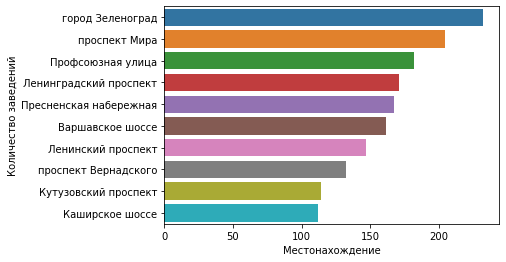

In [43]:
sns.barplot(data=top_streets, x='id', y='street')
plt.xlabel('Местонахождение')
plt.ylabel('Количество заведений')
plt.show()

In [37]:
area_rest_qnt = data_merged.groupby(['area'])['id'].count().reset_index().sort_values(by='id', ascending=False)
top_areas = area_rest_qnt.head(10)
display(top_areas)

,area,id
118,Тверской район,1127
23,Пресненский район,788
4,Басманный район,702
15,Мещанский район,668
9,Даниловский район,667
11,Донской район,581
117,Таганский район,528
20,Обручевский район,492
41,Район Замоскворечье,479
38,Район Гагаринский,474


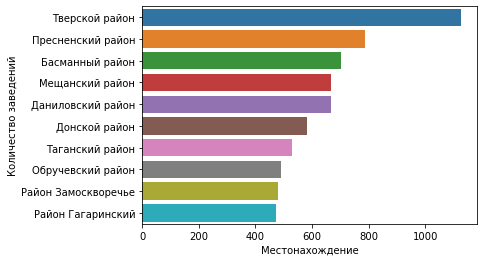

In [44]:
sns.barplot(data=top_areas, x='id', y='area')
plt.xlabel('Местонахождение')
plt.ylabel('Количество заведений')
plt.show()

Итак,
если мы отберем ТОП-10 улиц по количеству ресторанов в Москве, то получаются магистральные улицы, которые проходят через несколько районов города. Сказать, что среди таких районов есть какие-то особенно выделяющиеся, нельзя.<br>
При этом если мы осортируем районы по количеству заведение, то в ТОП-10 районов окажутся те, что располагаются в центре (или очень близко к центру) Москвы.

In [45]:
print(area_rest_qnt['id'].sum())
print(data['object_name'].count())

29510
15366


In [40]:
street_rest_1 = street_rest_qnt.query('0<id<2')
street_rest_1.info()
display(street_rest_1.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 208 to 587
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  560 non-null    object
 1   area    560 non-null    object
 2   id      560 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 17.5+ KB


,street,area,id
208,5-й проезд Марьиной Рощи,Район Марьина роща,1
204,5-й Котельнический переулок,Таганский район,1
205,5-й Монетчиковский переулок,Район Замоскворечье,1
2262,улица Шумкина,Район Сокольники,1
21,1-й Котельнический переулок,Таганский район,1
206,5-й Рощинский проезд,Даниловский район,1
1167,Печорская улица,Бабушкинский район,1
2261,улица Шумилова,Район Кузьминки,1
18,1-й Кожуховский проезд,Даниловский район,1
228,7-я улица Лазенки,Район Ново-Переделкино,1


In [41]:
street_rest_qnt.query('id == 1').shape

(560, 3)

Всего 560 улиц с 1 заведением. При этом важно отметить, что есть ошибки, вызванные разделением столбцов.

In [42]:
area_str_1_rest = street_rest_1.groupby(['area'])['id'].count().reset_index().sort_values(by='id', ascending=False)
display(area_str_1_rest.head(10))
display(area_str_1_rest.tail(10))

,area,id
93,Таганский район,27
79,Район Хамовники,26
3,Басманный район,25
94,Тверской район,20
20,Пресненский район,19
49,Район Марьина роща,18
21,Район Арбат,17
13,Мещанский район,16
73,Район Сокольники,15
33,Район Замоскворечье,14


,area,id
15,Молжаниновский район,1
48,Район Марфино,1
77,Район Филевский Парк,1
75,Район Строгино,1
1,Алтуфьевский район,1
50,Район Марьино,1
51,Район Матушкино-Савелки,1
52,Район Метрогородок,1
54,Район Москворечье-Сабурово,1
18,Обручевский район,1


Интересно отметить, что большое количество улиц с одним заведением также часто находятся в центре города. Кроме, пожалуй, районов Сокольники, Марьина роща и Мещанского.<br>
При этом районы с одним рестораном находятся на окраинах города.

## Выводы

### Предобработка данных

Таблица состоит из 6 колонок и 15366 строк.<br>
<br>
Есть данные разных типов:
- id и number целочисленные,
- object_name, object_type, chain, address - категориальные.

Пропуски данных и явные дубликаты отсутствуют.

В данных 15366 строк и:<br>
- 10393 уникальных названия заведений: скорее всего, присутствуют сети ресторанов с одним именем, потому что дубликатов не выявлено.<br>
- 2 вида ресторанов по количеству заведений: сетевые и несетевые (подтверждение гипотезы выше).<br>
- типов заведений может быть 9.<br>
- уникальных адресов 9108: соответственно, в некоторых домах может быть несколько разных ресторанов.<br>
- вариаций количества посадочных мест - 315: от 0 (киоск?) до 1700 человек.<br>

### Анализ данных
**Особенности заведений по числу посадочных мест**
Больше всего общественного питания типа: кафе, затем столовых и на третьем месте рестораны.
Большая часть заведений не являются сетевыми.
Максимальное число посадочных мест характерно для столовых, на втором месте - рестораны. Самое маленькое количество посадочных мест в кафе. 

**Особенности сетевых заведений**
Наиболее часто среди сетевых заведений встречаются: предприятия быстрого обслуживания, отделы кулинарии в магазинах, рестораны.
Большая часть сетевых заведений имеет ориентировочно до 100 посадочных мест. Больше 100 посадочных мест встречаются редко. Т.е. для сетевых ресторанов характерно много заведений с небольшим числом посадочных мест в каждом.

**Местоположение заведений общественного питания**
- **ТОП-10 улиц** по количеству ресторанов в Москве - это крупные магистрали, которые проходят через несколько районов города. Сказать, что среди районов, по которым проходят эти магистрали, есть какие-то особенно выделяющиеся, - нельзя.<br>
- если мы отсортируем районы по количеству заведений, то в **ТОП-10 районов** окажутся те, что располагаются в центре (или очень близко к центру) Москвы. Интересно отметить, что большое количество улиц с одним заведением также часто находятся в центре города. Кроме, пожалуй, районов Сокольники, Марьина роща и Мещанского.<br>
- районы с одним рестораном находятся на обычных улицах на окраинах города.

### Рекомендации по открытию заведения общественного питания
- при открытии заведения рекомендую сразу думать о возможностях масштабирования проекта и открывать формат, который удобно делать сетевым.
- с учетом особенностей сетевых заведений: это должно быть место с небольшим числом посадочных мест (на 20)
- предприятие быстрого обслуживания будет оптимальным с точки зрения возможностей сетевого распространения и наиболее популярного количества посадочных мест.
- очень много заведений общественного питания находятся на основных магистралях или в центре города. При открытии рекомендую придерживаться именно такой георгафии, т.к. наличие предложения подтверждает наличие спроса на общественное питание. Рекомендованный район: Тверской, Пресненский. Рекомендованная улица: проспект Мира (Мещанский район).
- НЕ рекомендую открывать заведение на второстепенной улице на окраине города.